In [1]:
import sys
sys.path.append("../src")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from exact_solution import solve_master_equation, one_excited_emitter_state
from qmarina import run_qmarina_on_simulator

In [2]:
N = 3
g = 4
kappa = 2
times = np.linspace(0, 3, 101)

In [3]:
initial_state = one_excited_emitter_state(N, 1)
qutip_results = solve_master_equation(N, g, kappa, initial_state, times)

In [4]:
qiskit_results = run_qmarina_on_simulator(N, g, kappa, times)

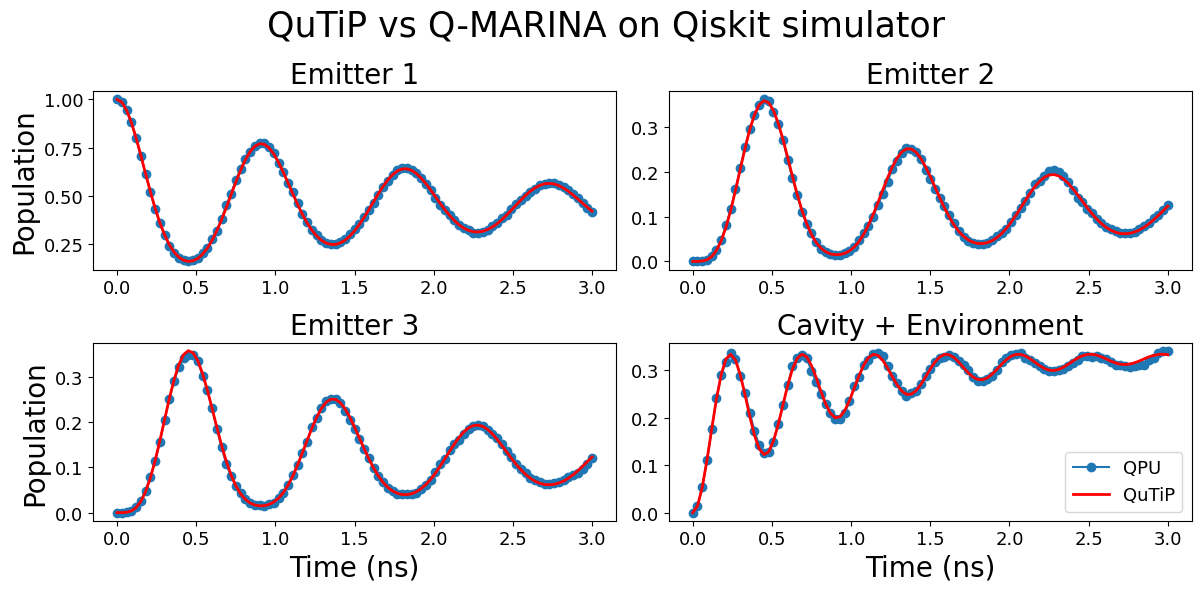

In [5]:
# Plot the RAW (no mitigation) data
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

for a, column in zip(axes.flatten(), qutip_results.columns):
    a.set_title(column, fontsize=20)
    a.plot(times, qiskit_results[column], marker='o', label="QPU")
    a.plot(times, qutip_results[column], lw=2, color='red', label="QuTiP")

    a.tick_params(axis='x', labelsize=13)
    a.tick_params(axis='y', labelsize=13)

axes[1][0].set_xlabel("Time (ns)", fontsize=20)
axes[1][1].set_xlabel("Time (ns)", fontsize=20)

axes[0][0].set_ylabel("Population", fontsize=20)
axes[1][0].set_ylabel("Population", fontsize=20)

axes[1][1].legend(fontsize=13)

fig.suptitle("QuTiP vs Q-MARINA on Qiskit simulator", fontsize=25)
plt.tight_layout()


In [6]:
fig.savefig("../figures/QMARINA_qiskit_simulation.eps")